In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v -p scikit-learn

Sebastian Raschka 10/12/2015 

CPython 3.5.0
IPython 4.0.0

scikit-learn 0.16.1


In [2]:
import sys
sys.path = ['../../..'] + sys.path

# Sequential Floating Forward Selection Examples

## Sections

- [Iris Example](#Iris-Example)
- [Wine Data Example](#Wine-Data-Example)
- [Gridsearch Example 1](#Gridsearch-Example-1)
- [Gridsearch Example 2](#Gridsearch-Example-2)

<br>
<br>

# Iris Example

[[back to top](#Sections)]

In [6]:
from collections import deque
stuck = deque(maxlen=3)
for i in range(10):
    stuck.append(i)
stuck

deque([7, 8, 9])

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from mlxtend.feature_selection import SFFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=4)

sffs = SFFS(knn, k_features=2, scoring='accuracy', cv=5)
sffs.fit(X, y)

print('Indices of selected features:', sffs.indices_)
print('CV score of selected subset:', sffs.k_score_)
print('New feature subset:')
sffs.transform(X)[0:5]

Features: 2/2

Indices of selected features: (2, 3)
CV score of selected subset: 0.966666666667
New feature subset:


array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

<br>
<br>

# Wine Data Example

[[back to top](#Sections)]

In [9]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Features: 13/13

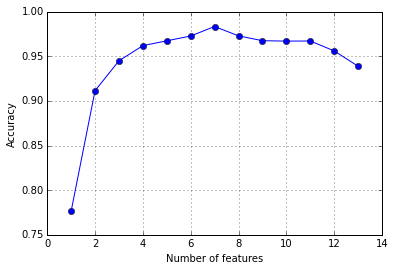

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scr = StandardScaler()
X_std = scr.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=4)

# selecting features
sffs = SFFS(knn, k_features=13, scoring='accuracy', cv=5)
sffs.fit(X_std, y)

# plotting performance of feature subsets
k_feat = [len(k) for k in sffs.subsets_]

plt.plot(k_feat, sffs.scores_, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

<br>
<br>

# Gridsearch Example 1

[[back to top](#Sections)]

Selecting the number of features in a pipeline.

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from mlxtend.feature_selection import SFFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

##########################
### Loading data
##########################

iris = load_iris()
X = iris.data
y = iris.target

##########################
### Setting up pipeline
##########################
knn = KNeighborsClassifier(n_neighbors=4)

sffs = SFFS(estimator=knn, k_features=2, scoring='accuracy', cv=5)

pipeline = Pipeline([
            ('scr', StandardScaler()), 
            ('sel', sffs),
            ('clf', knn)])

parameters = {'sel__k_features': [1,2,3,4]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

##########################
### Running GridSearch
##########################
grid_search.fit(X, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Features: 1/1[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
Features: 4/4[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.8s finished
Features: 1/1

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.960
Best parameters set:
	sel__k_features: 1


<br>
<br>

# Gridsearch Example 2

[[back to top](#Sections)]

In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from mlxtend.feature_selection import SFFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

##########################
### Loading data
##########################

iris = load_iris()
X = iris.data
y = iris.target

##########################
### Setting up pipeline
##########################
knn = KNeighborsClassifier(n_neighbors=4)

sffs = SFFS(estimator=knn, k_features=2, scoring='accuracy', cv=5)

pipeline = Pipeline([
            ('scr', StandardScaler()), 
            ('sel', sffs),
            ('clf', knn)])

parameters = {'sel__k_features': [1, 2, 3, 4],
              'sel__estimator__n_neighbors': [4, 5, 6],
              'clf__n_neighbors': [4, 5, 6]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

##########################
### Running GridSearch
##########################
grid_search.fit(X, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Features: 1/1[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
Features: 1/1[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    7.9s
Features: 4/4[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   16.3s finished
Features: 2/2

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score: 0.973
Best parameters set:
	clf__n_neighbors: 5
	sel__estimator__n_neighbors: 5
	sel__k_features: 2


The final feature subset can then be obtained as follows:

In [13]:
print('Best feature subset:')
grid_search.best_estimator_.steps[1][1].indices_

Best feature subset:


(2, 3)